In [1]:
from preamble import *
%matplotlib inline

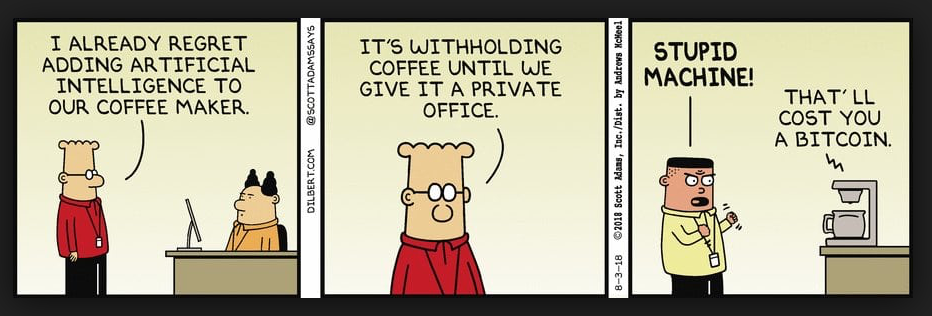

# Introduction

## Course metadata

- Course curators and instructors
  - Fibinse
  - Shubham
  - Sumukh
- Duration 
  - 7 sessions (every Tue and Thu, 5pm - 6pm)
- Content sources
  - https://github.com/amueller/introduction_to_ml_with_python
  - https://github.com/justmarkham
  - Books 
    - Introduction to Machine Learning with Python
    - The Elements of Statistical Learning 
      - available online for free on the author's website
        http://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf
  - [Kaggle Learn](https://www.kaggle.com/learn/overview)
  - other sources referenced inline in the content
- Notation
  - notebooks contain cells with textual description, instructions that require you to act, and outputs. In order to help differentiate the cells, the instructions that require you to act are prefixed by an indent and appear as shown below. Empty cells that follow the instruction should be used to run code:
  > do something
  - Code within text is highlighted in this fashion ``` code sample ```


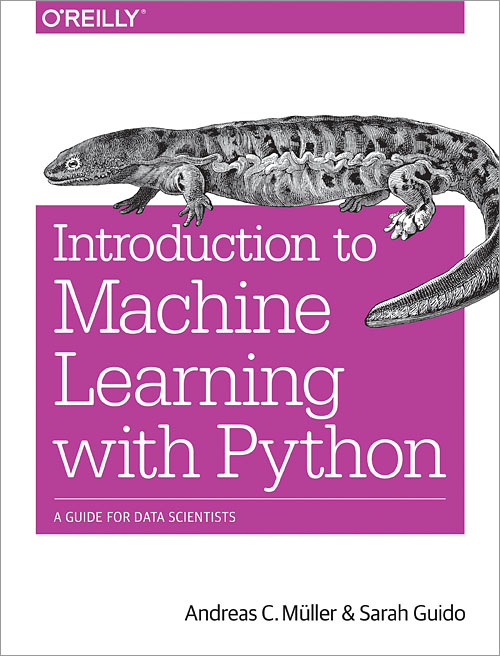

## Course outline

1. Introduction (you are here!)
2. Model evaluation
   - Precision / Recall
   - Underfitting / Overfitting
   - Holdout
   - Cross validation
3. Regression
   - Linear regression
   - Ridge
   - Lasso
4. Classifiers
   - Logistic regression
   - Linear SVM
5. Classifiers contd..
   - Decision trees
   - Random forests
   - Naive Bayes
6. Data pre-processing
   - Data transformation
   - Dimentionality reduction 
   - Pipelines
   - Grid search
7. Clustering
   - Kmeans
   - Hierarchical clustering

## Primary libraries/toolkits

Some snippets describing the packages from their respective webpages

### pandas

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

https://pandas.pydata.org

### numpy

NumPy is the fundamental package for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

http://www.numpy.org

### matplotlib

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms

https://matplotlib.org

### seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics

https://seaborn.pydata.org

### scikit-learn

Machine learning in Python
- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

https://scikit-learn.org

# Exploring Data with Pandas

The operations in pandas should be familiar to anyone who has worked with SQL. The concepts of selection, aggregation, joins are common to pandas and SQL. The equivalent of a table in SQL is the dataframe in pandas.

Data manipulation is easier using Pandas than with SQL.

Pandas only works in memory whereas SQL can work over very large datasets.

One key difference between relational databases and pandas is in the logical structure of data. While relational databases treat tables as sets of records, the rows in a dataframe are ordered by their index. This allows us to perform list operations on records in a dataframe. It's equivalent is not always available in SQL.

## Basics

### import
import pandas using the following command

```import pandas as pd```

### data structures
Two main data structures for working with data:
- Series 
  - a one dimensional array of values 
- Dataframe
  - a two dimensional table of columns and rows
  - each column in a dataframe is a series

### load data

``` df = pd.read_csv(file_path) ```

### shape

``` df.shape ```

### head

``` df.head() ```

``` df.sample() ```

### index and columns

- index
- multi-level index
- columns
- rename

``` df.index ```

``` df.columns ```

``` df.rename(columns={}) ```

### summary statistics

- count
- mean
- min 
- max
- percentiles

``` df.describe() ```

### data types

- categorical
- numeric
- ordinal

``` df.dtypes ```

### ML dataset nomenclature

- feature / attribute
- instance

***

For hands on data-exploration we'll use the Wine Quality dataset from UCI data repository: https://archive.ics.uci.edu/ml/datasets/wine+quality

Reference:
<div> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. </div>

The above data has been downloaded into `data/winequality` folder

> import pandas

In [2]:
import pandas as pd

Files for red wine and white wine are present in the following folders:

```
data/winequality/winequality-red.csv
data/winequality/winequality-white.csv
```

Print the top two lines from the red wine data

In [4]:
# !head -n 2 data/winequality/winequality-red.csv
! ls -lrt

total 3952
-rw-r--r--   1 sumukh  staff    76761 Jan 17 01:10 cover.jpg
-rw-r--r--   1 sumukh  staff      137 Jan 17 01:10 environment.yml
-rw-r--r--   1 sumukh  staff      774 Jan 17 01:10 preamble.py
drwxr-xr-x   3 sumukh  staff       96 Jan 17 01:34 __pycache__
drwxr-xr-x  32 sumukh  staff     1024 Jan 17 01:34 mglearn
drwxr-xr-x   3 sumukh  staff       96 Jan 17 01:34 cache
drwxr-xr-x   6 sumukh  staff      192 Jan 17 05:25 data
-rw-r--r--   1 sumukh  staff       92 Jan 17 11:39 requirements.txt
-rw-r--r--   1 sumukh  staff     4040 Jan 17 15:26 README.md
drwxr-xr-x  11 sumukh  staff      352 Jan 17 16:25 original
drwxr-xr-x  20 sumukh  staff      640 Jan 17 16:45 images
-rw-r--r--@  1 sumukh  staff  1925213 Jan 17 17:23 01-Introduction.ipynb


> Load the red wine and white wine data into dataframes called red_df and white_df, respectively

In [5]:
red_df = pd.read_csv('data/winequality/winequality-red.csv', sep=';')
white_df = pd.read_csv('data/winequality/winequality-white.csv', sep=';')

In [6]:
red_df.shape

(1599, 12)

In [7]:
white_df.shape

(4898, 12)

> Print shapes of the files to ensure the data were loaded successfully

In [8]:
print(f'red_df shape: {red_df.shape}; white_df shape: {white_df.shape}') 

red_df shape: (1599, 12); white_df shape: (4898, 12)


> Print a sample of 5 rows from each of the dfs

In [9]:
red_df.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1057,7.6,0.420,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1,5
1311,6.5,0.510,0.15,3.0,0.064,12.0,27.0,0.99290,3.33,0.59,12.8,6
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
215,7.0,0.490,0.49,5.6,0.060,26.0,121.0,0.99740,3.34,0.76,10.5,5
1221,10.9,0.320,0.52,1.8,0.132,17.0,44.0,0.99734,3.28,0.77,11.5,6


> Print the index and view output

In [10]:
red_df.index

RangeIndex(start=0, stop=1599, step=1)

> Print columns in red_df

In [11]:
red_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

> Rename all columns to lowercase and use underscore in place of space 

In [13]:
red_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
red_df.columns = ['_'.join(c.split()).lower() for c in red_df.columns]
red_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

> Print summary statistics 

In [15]:
red_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
red_df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

> Compare the alcohol content in red wine vs white wine for this dataset

In [18]:
white_df.describe().alcohol

count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

In [17]:
red_df.describe().alcohol

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

## Indexing

- 33.33% of the 15 top voted questions in pandas StackOverflow were related to indexing
- different ways of performing the same operation

### selecting a column 

Columns can be selected in the following way if the column name is a valid python variable

``` df.column_name ```

Otherwise, a column can be selected as follows:

``` df['column name'] ```

Selecting multiple columns:

``` df[['column name 1', 'column name 2', 'column name 3', 'column name 4']] ```

### selecting rows and columns by position

For row and column selection by position: ``` df.ix[row_positions, col_positions] ``` 

For only row selection ``` df.ix[row_positions] ```

### selecting rows and columns by value

For row and column selection by value: ``` df.ix[row_condition, col_condition] ``` 

### creating new columns

``` df['new column'] = df.current_column.some_transform() ```

OR

``` df.loc[:, 'new column'] = df.current_column.some_transform() ```

Conditional assignment 

``` df.loc[<row select condition>, 'new column'] = df.current_column.some_transform() ```

Ensure indexes match on LHS and RHS in all the above statements.

To set a column to a fixed value use:

``` df['new column'] = value ```

OR

``` df.loc[:, 'new column'] = value ```

> Select red wines that have a volatile acidity greater than 1.1

In [21]:
red_df[red_df.volatile_acidity > 1.1]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
724,7.5,1.115,0.10,3.10,0.086,5.0,12.0,0.99580,3.54,0.60,11.2,4
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3
1312,8.0,1.180,0.21,1.90,0.083,14.0,41.0,0.99532,3.34,0.47,10.5,5


> Create a column called `colour` in both red and white dataframes and assign the same to 'red' and 'white' respectively 

> Add a column called `quality_label` to both dataframes based on the following condition:
  - quality <= 5 is 'low'
  - quality > 5 and quality <= 7 is 'medium'
  - quality > 7 is 'high'

In [22]:
def quality_label(value):
  if value <= 5:
    return 'low'
  elif value <= 7:
    return 'medium'
  return 'high'

In [23]:
quality_label(10)

'high'

In [24]:
red_df['quality_label'] = red_df.quality.apply(quality_label)

## Visualization

Content in this section is inspired by this blog: https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

> Import matplotlib and seaborn libraries as shown
```
import matplotlib.pyplot as plt
import seaborn as sns
```

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate analysis

**Histograms**

- Great way to visualize distributions of numeric data

Pandas has a ```hist``` function on dataframe that plots a histogram of all numeric variables

/Users/sumukh/Envs/ml_bootcamp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


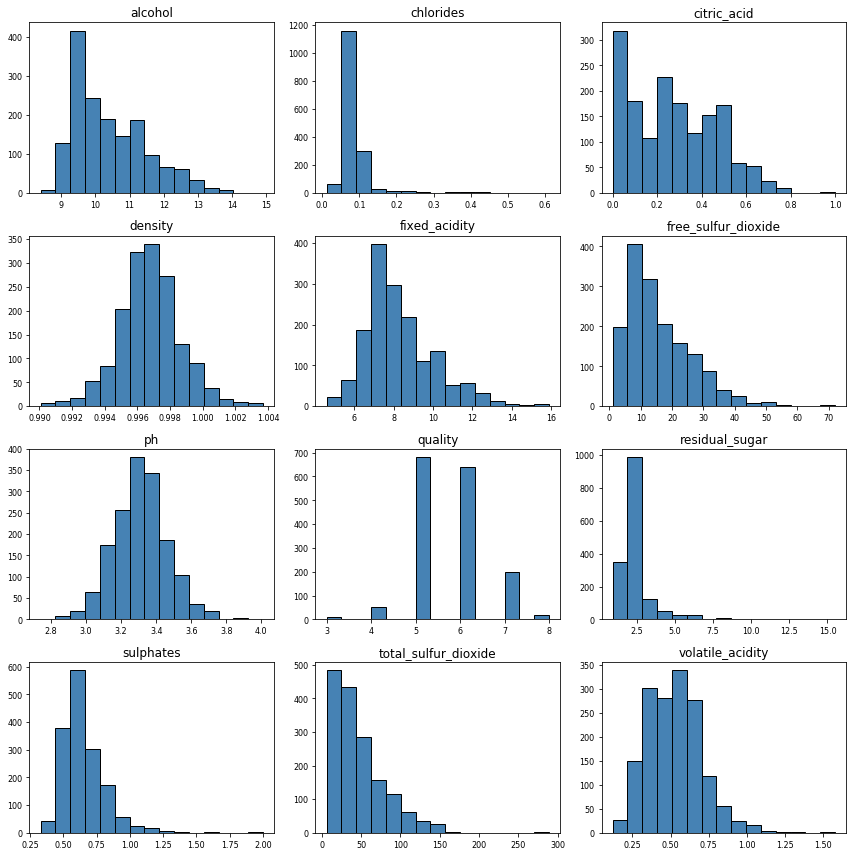

In [63]:
f, ax = plt.subplots(figsize=(10,10))
red_df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.show()

### Bivariate analysis

**Heatmap**

Helps identify correlations between variables in a dataset.

Correlation measures the strength of association between two variables and the direction of the relationship. A high positive values indicates a strong correlation that indicates that when one variable is high the other is also likely to be high. A value close to zero indicates no correlation. Negative values indicate that an increase in one variable is liked with a decrease in the other variable.

Pandas contains a method ``` df.corr ``` on Series and DataFrame objects that help us find the correlation using the following correlation algorithms

- pearson (default)
- kendall
- spearman

> Find the correlation between variables in the wines df

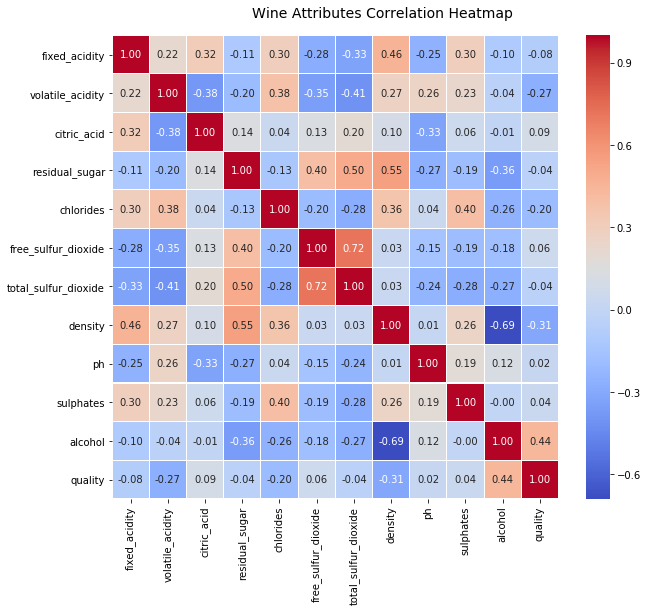

In [72]:
f, ax = plt.subplots(figsize=(10, 8))
corr = wine_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

# Types of Machine Learning Algorithms

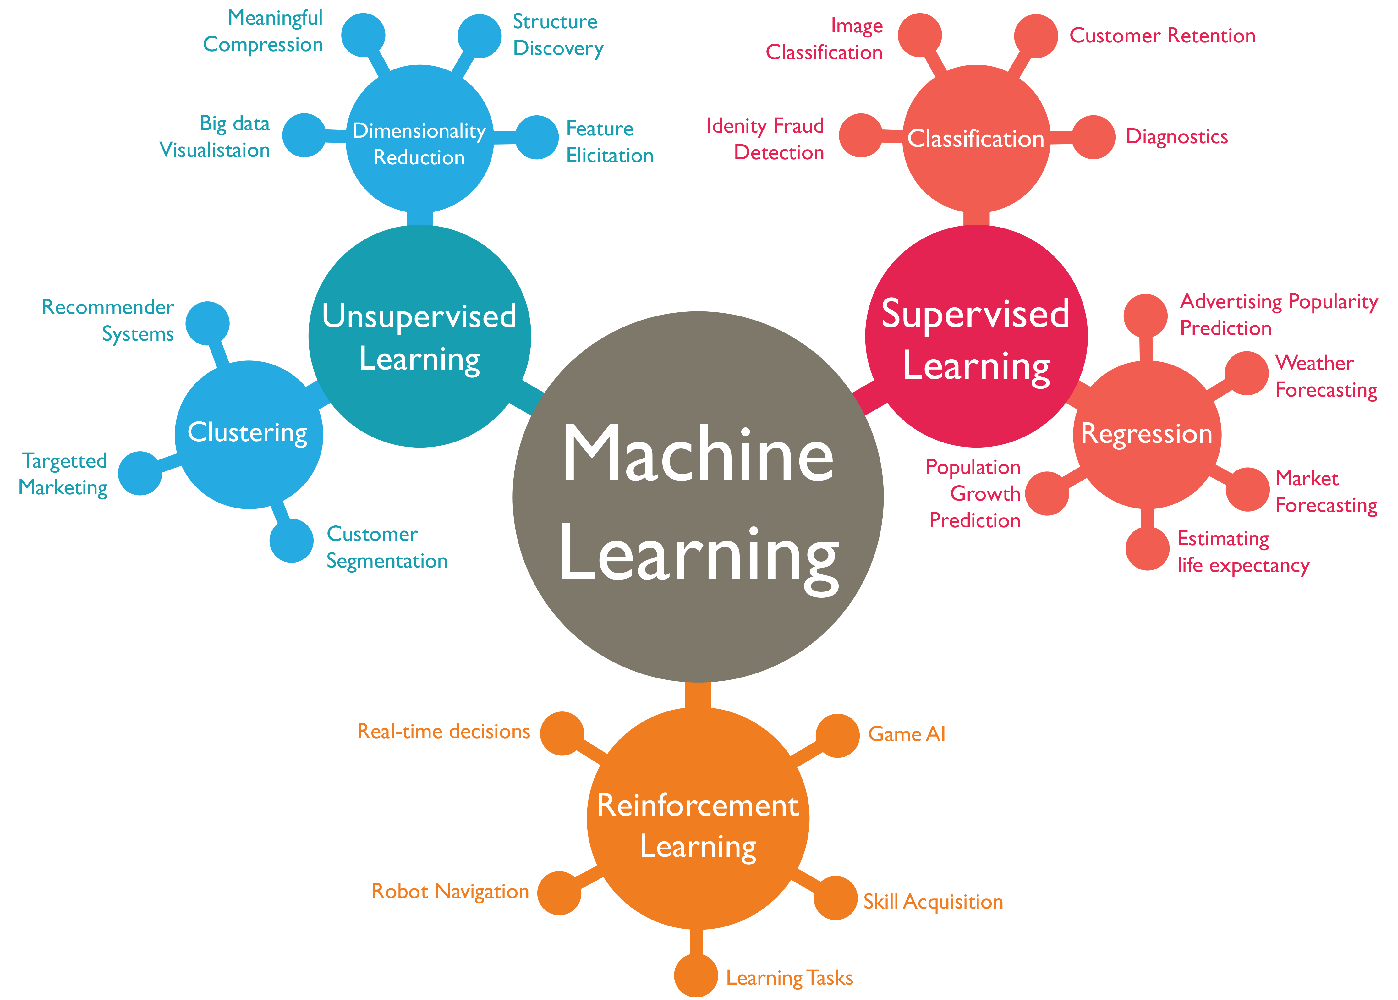

image source: https://cybrml.com/2017/01/23/ml-in-cs-4-machine-learning-technical-review/

## Supervised Learning

- Most common class of machine learning applications
- Used to predict a certain outcome when input conditions are provided
- Typical uses historical data to make a prediction on new data where we do not have the answer
- The historical data are labelled with annotations 

### Classification

- goal is to predict a class label, which is a choice from a predefined list of possibilities
- Example: Customer churn prediction

> In the wine dataset above which attribute can be a class variable?

  
### Regression

- goal is to predict a numeric value based on past values
- Example: Sales forecasts

> Which attribute can function as the predict variable

## Unsupervised Learning 

- No labelled data is provided
- Used to find patterns present in data without any external support

### Clustering 

- Identify groups of instances that are more proximate to others in the same group in comparison with instances in other groups

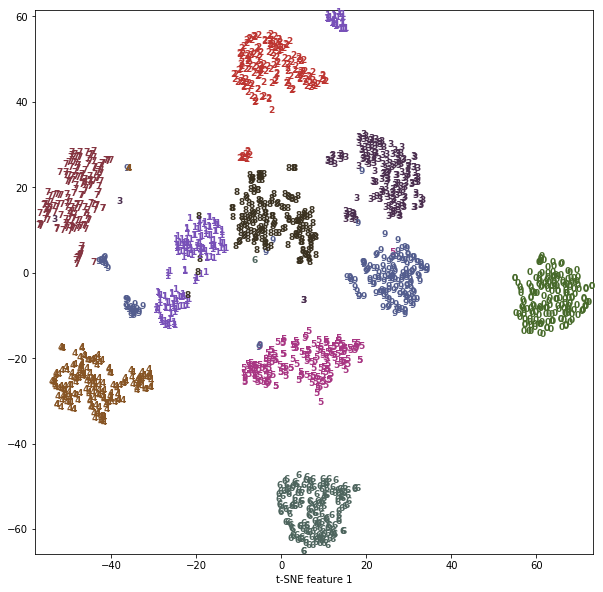

### Association Mining

- Market basket analysis 
- Beer diapers correlation

> Compare association mining with bivariate analysis discussed earlier

## Scikit-Learn basics

- Model and transformer API
  - Each machine learning models supports the following two methods
    ``` model.fit(data) ``` is used to train a model <br/>
    ``` model.predict(new_data) ``` is used to run the trained model on new data
  - Preprocessors support the following two main methods <br/>
    ``` transformer.fit(data) ``` fit parameters of the transformer using the data <br/>
    ``` transformed_data = transformer.transform(new_data) ``` transforms new_data based on trained parameters
- Contains sample datasets

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


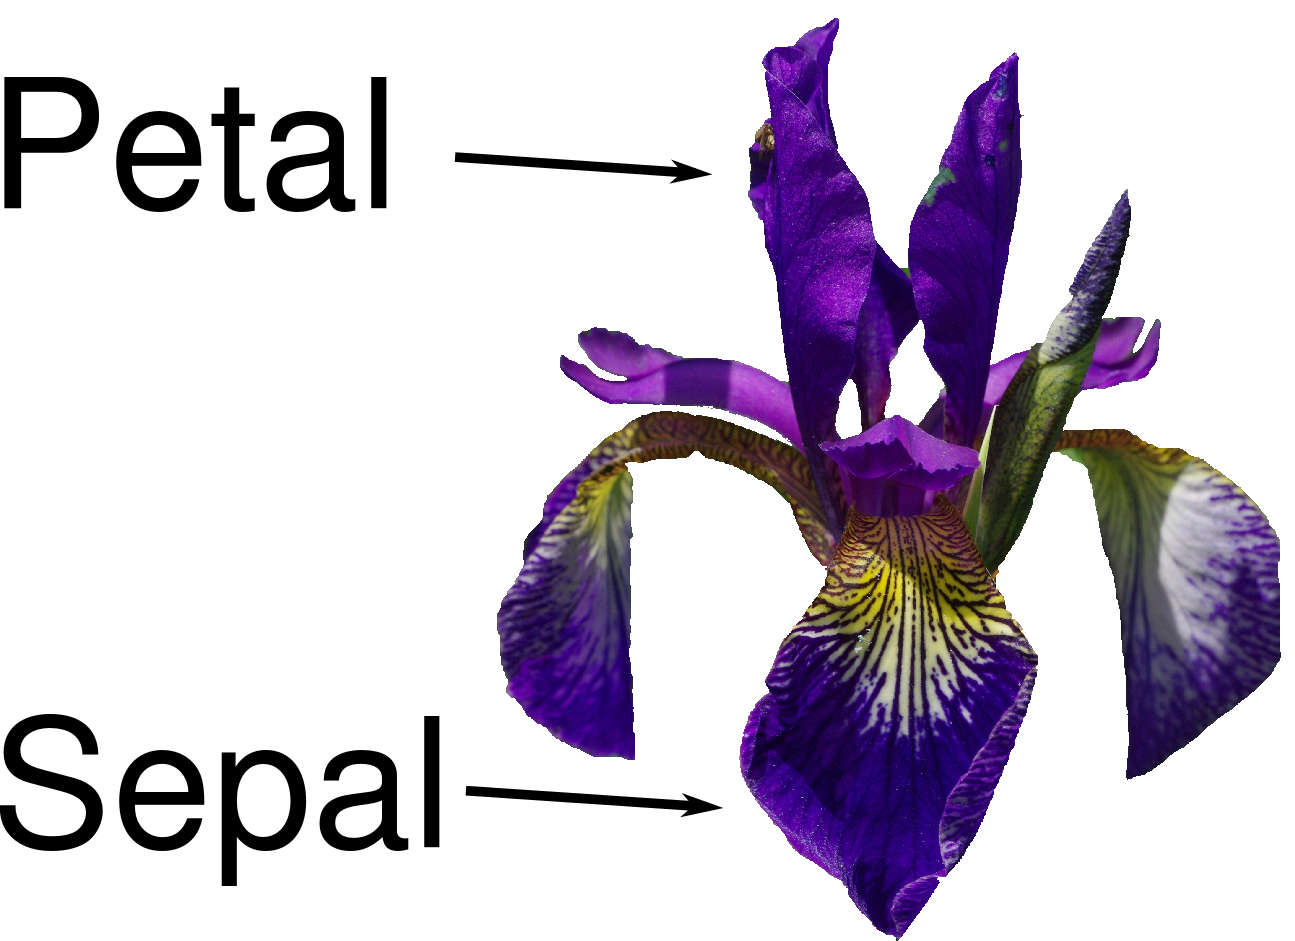

In [7]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [8]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [10]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


# KNN Classification

Stores all training data with labels. Labels new instances based on the majority class of the nearest neighbours of the new instance in the given parameter space. The $k$ in KNN decides the number of neighbours to consider for the nearest neighbour calculation

http://vision.stanford.edu/teaching/cs231n-demos/knn/

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(iris_dataset['data'], iris_dataset['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [12]:
prediction = knn.predict(iris_dataset['data'])

In [13]:
print("Test set score: {:.2f}".format(np.mean(prediction == iris_dataset['target'])))

Test set score: 1.00


## Advantages and Disadvantages:

Advantages: 
+ Simple to understand and explain
+ Model training is fast
+ Can be used for classification and regression

Disadvantages:
- Must store all of the training data
- Prediction phase can be slow when n is large
- Sensitive to irrelevant features
- Sensitive to the scale of the data
- Accuracy is (generally) not competitive with the best supervised learning methods